In [1]:
# Dependencies and Setup
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns
sns.set_style('white')

In [2]:
# Codes for each Data Frame

Data_path_df = pd.read_csv('Data/National_Data.csv')

# Pulling Data to verify source 
Data_path_df.head()

,yearid,fipscode,raceid,ageid,genderid,educationid,indicatorid,miscid,datasourceid,estimateid,SuppressID,datasetid,GeoLevel,Estimate,SeEstimate,LowerLimit,UpperLimit
0,1980,-1,0,5,0,0,1,0,30,61,0,40,National,1,0.1,0.9,1.2
1,1980,-1,0,5,0,0,1,0,30,101,0,40,National,915,76,764,1065
2,1980,-1,0,6,0,0,1,0,3,61,0,3,National,5.4,0.3,4.8,6
3,1980,-1,0,6,0,0,1,0,3,101,0,3,National,2337,143,2054,2621
4,1980,-1,0,6,0,0,1,0,30,61,0,40,National,5.4,0.3,4.8,6


In [18]:
# Setting up the value data set that will help us class the Diabetes per Gender

Data_gender_df = Data_path_df.loc[:,["yearid", "ageid", "genderid", "datasetid", "estimateid", "Estimate"]]
    
Data_gender_df.head()

,yearid,ageid,genderid,datasetid,estimateid,Estimate
0,1980,5,0,40,61,1
1,1980,5,0,40,101,915
2,1980,6,0,3,61,5.4
3,1980,6,0,3,101,2337
4,1980,6,0,40,61,5.4


In [22]:
# Pulling Total of Diabetes Cases and the breakdown 

male_gender_porcentage_df = Data_gender_df.loc[(Data_path_df["yearid"] >= 2000) & (Data_path_df["ageid"]== 99) & \
                                  (Data_path_df["genderid"]== 1) & (Data_path_df["datasetid"]== 40) & \
                                  (Data_path_df["estimateid"]== 61)].dropna()
    
male_gender_porcentage_df = male_gender_porcentage_df.reset_index()
male_gender_porcentage_df
    
    #Male_gender_df =  Male_gender_df.reset_index()
    #Male_gender_df


,index,yearid,ageid,genderid,datasetid,estimateid,Estimate
0,1368,2000,99,1,40,61,6.1
1,1435,2001,99,1,40,61,6.6
2,1502,2002,99,1,40,61,6.9
3,1569,2003,99,1,40,61,6.8
4,1636,2004,99,1,40,61,7.3
5,1703,2005,99,1,40,61,7.5
6,1770,2006,99,1,40,61,7.7
7,1837,2007,99,1,40,61,7.8
8,1904,2008,99,1,40,61,8.2
9,1971,2009,99,1,40,61,9.5


In [23]:
female_gender_porcentage_df = Data_gender_df.loc[(Data_path_df["yearid"] >= 2000) & (Data_path_df["ageid"]== 99) & \
                                  (Data_path_df["genderid"]== 2) & (Data_path_df["datasetid"]== 40) & \
                                  (Data_path_df["estimateid"]== 61)].dropna()
    
female_gender_porcentage_df = female_gender_porcentage_df.reset_index()
female_gender_porcentage_df

,index,yearid,ageid,genderid,datasetid,estimateid,Estimate
0,1372,2000,99,2,40,61,5.7
1,1439,2001,99,2,40,61,6.2
2,1506,2002,99,2,40,61,6.1
3,1573,2003,99,2,40,61,6.3
4,1640,2004,99,2,40,61,6.8
5,1707,2005,99,2,40,61,7.4
6,1774,2006,99,2,40,61,7.8
7,1841,2007,99,2,40,61,7.7
8,1908,2008,99,2,40,61,8.3
9,1975,2009,99,2,40,61,8.5


In [53]:
#Combine both genders in a filtered table

Gender_porcentage_graph = pd.merge(male_gender_df,female_gender_df, how='outer')
Gender_porcentage_graph_df = Gender_porcentage_graph.loc[:,["genderid", "Estimate"]]
Gender_porcentage_graph_df.head()


,genderid,Estimate
0,1,6.1
1,1,6.6
2,1,6.9
3,1,6.8
4,1,7.3


In [54]:
#An error was not letting me pull the plot because "Estimate" was showing as Object. Now with the conversion of "Estimate" to float Plot is successfuly showing.
Gender_porcentage_graph_df['Estimate'] = pd.to_numeric(Gender_porcentage_graph_df['Estimate'])
Gender_porcentage_graph_df.dtypes

genderid      int64
Estimate    float64
dtype: object

<IPython.core.display.Javascript object>


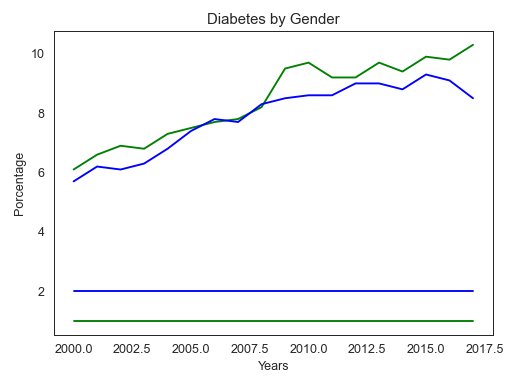

In [63]:
#Gender_graph = male_gender_df.plot(kind="bar", figsize=(20,3)) + female_gender_df.plot(kind="bar", figsize=(20,3))

#Gender_graph.set_xticklabels(male_gender_df["Estimate"], rotation=45)

years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
Male_diabetes_porcentage = Gender_porcentage_graph_df.loc[(Gender_porcentage_graph_df["genderid"]== 1) & (Gender_porcentage_graph_df["Estimate"])]
Female_diabetes_porcentage = Gender_porcentage_graph_df.loc[(Gender_porcentage_graph_df["genderid"]== 2) & (Gender_porcentage_graph_df["Estimate"])]


plt.plot(years, Male_diabetes_porcentage, color="green", label="Male %")
plt.plot(years, Female_diabetes_porcentage, color="blue", label="Female %")

plt.title("Diabetes by Gender")
plt.ylabel("Porcentage")
plt.xlabel("Years")

plt.tight_layout()
plt.show()


#x_axis = np.arange(len(Gender_df))
#Male_gender = [value for value in x_axis]

In [9]:
Male_diabetes_porcentage

,genderid,Estimate
0,1,6.1
1,1,6.6
2,1,6.9
3,1,6.8
4,1,7.3
5,1,7.5
6,1,7.7
7,1,7.8
8,1,8.2
9,1,9.5


In [69]:
# Pulling Total of Diabetes Cases and the breakdown by every 1,000 

male_gender_totals_df = Data_gender_df.loc[(Data_gender_df["yearid"] >= 2000) & (Data_gender_df["ageid"]== 99) & \
                                  (Data_gender_df["genderid"]== 1) & (Data_gender_df["datasetid"]== 40) & \
                                  (Data_gender_df["estimateid"]== 101)].dropna()
    
male_gender_totals_df = male_gender_totals_df.reset_index()
male_gender_totals_df
    

,index,yearid,ageid,genderid,datasetid,estimateid,Estimate
0,1369,2000,99,1,40,101,5907
1,1436,2001,99,1,40,101,6425
2,1503,2002,99,1,40,101,6826
3,1570,2003,99,1,40,101,6990
4,1637,2004,99,1,40,101,7541
5,1704,2005,99,1,40,101,7896
6,1771,2006,99,1,40,101,8204
7,1838,2007,99,1,40,101,8391
8,1905,2008,99,1,40,101,8934
9,1972,2009,99,1,40,101,10447


In [70]:
female_gender_totals_df = Data_gender_df.loc[(Data_gender_df["yearid"] >= 2000) & (Data_gender_df["ageid"]== 99) & \
                                  (Data_gender_df["genderid"]== 2) & (Data_gender_df["datasetid"]== 40) & \
                                  (Data_gender_df["estimateid"]== 101)].dropna()
    
female_gender_totals_df = female_gender_totals_df.reset_index()
female_gender_totals_df

,index,yearid,ageid,genderid,datasetid,estimateid,Estimate
0,1373,2000,99,2,40,101,5956
1,1440,2001,99,2,40,101,6581
2,1507,2002,99,2,40,101,6565
3,1574,2003,99,2,40,101,7022
4,1641,2004,99,2,40,101,7585
5,1708,2005,99,2,40,101,8290
6,1775,2006,99,2,40,101,8906
7,1842,2007,99,2,40,101,8882
8,1909,2008,99,2,40,101,9717
9,1976,2009,99,2,40,101,10043


In [71]:
Gender_totals_graph = pd.merge(male_gender_totals_df,female_gender_totals_df, how='outer')
Gender_totals_graph_df = Gender_totals_graph.loc[:,["genderid", "Estimate"]]
Gender_totals_graph_df.head()

,genderid,Estimate
0,1,5907
1,1,6425
2,1,6826
3,1,6990
4,1,7541


In [72]:
#An error was not letting me pull the plot because "Estimate" was showing as Object. Now with the conversion of "Estimate" to float Plot is successfuly showing.
Gender_totals_graph_df['Estimate'] = pd.to_numeric(Gender_totals_graph_df['Estimate'])
Gender_totals_graph_df.dtypes

genderid    int64
Estimate    int64
dtype: object

In [78]:
#Gender_graph = male_gender_df.plot(kind="bar", figsize=(20,3)) + female_gender_df.plot(kind="bar", figsize=(20,3))

#Gender_graph.set_xticklabels(male_gender_df["Estimate"], rotation=45)

years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
Male_diabetes_totals = Gender_totals_graph_df.loc[(Gender_totals_graph_df["genderid"]== 1) & (Gender_totals_graph_df["Estimate"])]
Female_diabetes_totals = Gender_totals_graph_df.loc[(Gender_totals_graph_df["genderid"]== 2) & (Gender_totals_graph_df["Estimate"])]


#plt.plot(years, Male_diabetes_totals, color="green", label="Male Totals")
#plt.plot(years, Female_diabetes_totals, color="blue", label="Female Totals")

#plt.title("Diabetes by Gender")
#plt.ylabel("Totals")
#plt.xlabel("Years")

plt.tight_layout()
plt.show()
